In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import os

os.listdir('topic_data')
os.listdir('topic_data/t1')

['clean_543.txt',
 '.DS_Store',
 'clean_542.txt',
 'clean_568.txt',
 'clean_541.txt',
 'clean_569.txt',
 'clean_526.txt',
 'clean_527.txt',
 'clean_525.txt',
 'clean_524.txt',
 'clean_508.txt',
 'clean_520.txt',
 'clean_521.txt',
 'clean_509.txt',
 'clean_523.txt',
 'clean_522.txt',
 'clean_507.txt',
 'clean_506.txt',
 'clean_504.txt',
 'clean_505.txt',
 'clean_528.txt',
 'clean_1.txt',
 'clean_503.txt',
 'clean_570.txt',
 'clean_567.txt',
 'clean_573.txt',
 'clean_572.txt',
 'clean_566.txt',
 'clean_562.txt',
 'clean_563.txt',
 'clean_561.txt']

In [10]:
def build_word_dict(t, d, count, word_value, visited_words):
        f = open('topic_data/' + d + '/' + t, 'r')
        x = f.readlines()
        f.close()

        for entry in x:
            #print (entry.split())
            for word in entry.split():
                if word not in visited_words:
                    word_value[word] = count[0]
                    visited_words.add(word)
                    count[0] += 1 

def pre_process():
    
    topic_directories = os.listdir('topic_data')
    
    visited_words = set()
    word_value = {}
    count = [4]
    
    for d in topic_directories:
        #print (d)
        if d != '.DS_Store':
            for t in os.listdir('topic_data/' + d):
                if t != '.DS_Store':
                    build_word_dict(t, d, count, word_value, visited_words)
                    
                    
    return word_value



d = pre_process()   
print (d)



{'The': 4, 'one-child': 5, 'policy': 6, '()': 7, 'is': 8, 'the': 9, 'limitation': 10, 'in': 11, 'population': 12, 'control': 13, 'of': 14, "People's": 15, 'Republic': 16, 'China': 17, '(PRC).': 18, 'Chinese': 19, 'government': 20, 'refers': 21, 'to': 22, 'it': 23, 'under': 24, 'official': 25, 'translation': 26, 'family': 27, 'planning': 28, '[REF].': 29, 'It': 30, 'officially': 31, 'restricts': 32, 'married,': 33, 'urban': 34, 'couples': 35, 'having': 36, 'only': 37, 'one': 38, 'child,': 39, 'while': 40, 'allowing': 41, 'exemptions': 42, 'for': 43, 'several': 44, 'cases,': 45, 'including': 46, 'rural': 47, 'couples,': 48, 'ethnic': 49, 'minorities,': 50, 'and': 51, 'parents': 52, 'without': 53, 'any': 54, 'siblings': 55, 'themselves': 56, 'A': 57, 'spokesperson': 58, 'Committee': 59, 'on': 60, 'One-Child': 61, 'Policy': 62, 'has': 63, 'said': 64, 'that': 65, 'approximately': 66, '35.9%': 67, "China's": 68, 'currently': 69, 'subject': 70, 'restriction': 71, 'Special': 72, 'Administrativ

In [11]:
#Make train data

word_value = pre_process()   
train_data = []
train_label = []

PAD = 0

#print (word_value)

def get_all_train_data(train_data, word_value, train_label):
    
    topic_directories = os.listdir('topic_data')
    
    visited_words = set()
    #word_value = {}
    count = [4]
    label_count = 0
    
    for d in topic_directories:
        #print (d)
        if d != '.DS_Store':
            for t in os.listdir('topic_data/' + d):
                if t != '.DS_Store':
                    #print (d, t)
                    f = open('topic_data/' + d + '/' + t, 'r')
                    x = f.readlines()
                    f.close()
                    for entry in x:
                        temp_sentence = []
                        for word in entry.split():
                            if word in word_value:
                                temp_sentence.append(word_value[word])
                            else:
                                temp_sentence.append('?')

                        if len(temp_sentence) != 0:
                            train_label.append(label_count)
                            train_data.append(temp_sentence)
            label_count += 1
                            
                    
                    
    return train_data, train_label


'''
for entry in x:
    temp_sentence = []
    for word in entry.split():
        if word in word_value:
            temp_sentence.append(word_value[word])
        else:
            temp_sentence.append('?')
            
    train_data.append(temp_sentence)

'''

get_all_train_data(train_data, word_value, train_label)
print (train_data[300])
print (max(train_label))

#deconde train entry
'''
a = train_data[150]
for num in a:
    for k in word_value.keys():
        if word_value[k] == num:
            print (k)
'''

max_len = -1
for entry in train_data:
    max_len = max(max_len, len(entry))

print (max_len)
#Add the paddings to each entry
for i, entry in enumerate(train_data):
    if len(entry) != max_len:
        pads_to_add = max_len - len(entry)
        for _ in range(pads_to_add):
            train_data[i].append(PAD)
            

#print (train_data[50])       
print (max_len)
#print (train_data[100])

[346, 3925, 5733, 11, 9, 196, 5734, 3557, 5735, 29, 619, 9, 5736, 166, 14, 2570, 5737, 212, 561, 63, 3826, 129, 1034, 9, 5738, 2734, 14, 9, 5739, 59, 14, 9, 5740, 5741, 5742, 5743, 331, 14, 5216, 20, 5744, 78, 858, 51, 5745, 506, 4940, 17, 63, 5746, 22, 5747, 205, 81, 3758, 11, 9, 1948, 11, 637, 14, 141, 5748, 164, 115, 5749, 9, 201, 1079, 5750, 1134, 22, 9, 5751, 2779, 29, 4, 5556, 203, 1892, 194, 834, 22, 147, 3325, 1572, 14, 613, 2488, 11, 5752, 5753, 29]
1
507
507


In [12]:
print (len(train_data))
print (len(train_label))
for i in range(len(train_label)):
    if train_label[i] == 1:
        print (i)
        break
        
print (train_label[1416])

final_train_data = train_data[:1134] + train_data[1417:2617]
final_train_label = train_label[:1134] + train_label[1417:2617]

final_test_data = train_data[1134:1417] + train_data[2617:]
final_test_label = train_label[1134:1417] + train_label[2617:]

print (len(final_train_data), len(final_train_label))
print (len(final_test_data), len(final_test_label))



2917
2917
1417
0
2334 2334
583 583


In [13]:


#print (train_data)
train_data = keras.preprocessing.sequence.pad_sequences(final_train_data, value=PAD, padding='post', maxlen=507)
test_data = keras.preprocessing.sequence.pad_sequences(final_test_data, value=PAD, padding='post', maxlen=507)

In [14]:
len(train_data[50])

507

In [15]:
train_data[0]

array([ 4,  5,  6,  7,  8,  9,  5, 10, 11,  9, 12, 13,  6, 14,  9, 15, 16,
       14, 17, 18,  4, 19, 20, 21, 22, 23, 24,  9, 25, 26, 14, 27, 28,  6,
       29, 30, 31, 32, 33, 34, 35, 22, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 29, 57, 58, 14,  9,
       59, 60,  9, 61, 62, 63, 64, 65, 66, 67, 14, 68, 12,  8, 69, 70, 22,
        9,  5, 71, 29,  4, 72, 73, 74, 14, 75, 76, 51, 77, 78, 79, 80, 81,
        9, 82, 83, 80, 81, 84, 85, 78, 86, 87, 11, 88,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [16]:
len(train_data), len(train_data[1])

(2334, 507)

In [17]:
#27095

#vocab_size = 27095
vocab_size = 30000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          480000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 480,289
Trainable params: 480,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
print (len(train_data))

#Loss function and optimizer
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Need a validation set
x_val = train_data[:200] #350 was initial
partial_x_train = train_data[200:]

y_val = final_train_label[:200]
partial_y_train = final_train_label[200:]

#Train model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=500,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

2334
Train on 2134 samples, validate on 200 samples
Epoch 1/500
2134/2134 [==============================] - 1s 318us/step - loss: 0.6885 - acc: 0.5914 - val_loss: 0.7246 - val_acc: 0.0000e+00
Epoch 2/500
2134/2134 [==============================] - 0s 49us/step - loss: 0.6853 - acc: 0.5623 - val_loss: 0.7412 - val_acc: 0.0000e+00
Epoch 3/500
2134/2134 [==============================] - 0s 49us/step - loss: 0.6835 - acc: 0.5623 - val_loss: 0.7658 - val_acc: 0.0000e+00
Epoch 4/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.6819 - acc: 0.5623 - val_loss: 0.7913 - val_acc: 0.0000e+00
Epoch 5/500
2134/2134 [==============================] - 0s 59us/step - loss: 0.6802 - acc: 0.5623 - val_loss: 0.8099 - val_acc: 0.0000e+00
Epoch 6/500
2134/2134 [==============================] - 0s 66us/step - loss: 0.6789 - acc: 0.5623 - val_loss: 0.8265 - val_acc: 0.0000e+00
Epoch 7/500
2134/2134 [==============================] - 0s 56us/step - loss: 0.6783 - acc: 0.5623 - val_lo

Epoch 119/500
2134/2134 [==============================] - 0s 52us/step - loss: 0.4292 - acc: 0.8299 - val_loss: 0.8844 - val_acc: 0.4550
Epoch 120/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.4262 - acc: 0.8332 - val_loss: 0.9244 - val_acc: 0.4300
Epoch 121/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.4217 - acc: 0.8379 - val_loss: 0.8320 - val_acc: 0.5000
Epoch 122/500
2134/2134 [==============================] - 0s 56us/step - loss: 0.4198 - acc: 0.8341 - val_loss: 0.8040 - val_acc: 0.5250
Epoch 123/500
2134/2134 [==============================] - 0s 55us/step - loss: 0.4136 - acc: 0.8435 - val_loss: 0.9054 - val_acc: 0.4350
Epoch 124/500
2134/2134 [==============================] - 0s 55us/step - loss: 0.4119 - acc: 0.8500 - val_loss: 0.9309 - val_acc: 0.4150
Epoch 125/500
2134/2134 [==============================] - 0s 56us/step - loss: 0.4067 - acc: 0.8580 - val_loss: 0.8095 - val_acc: 0.5200
Epoch 126/500
2134/2134 [=========

2134/2134 [==============================] - 0s 53us/step - loss: 0.1502 - acc: 0.9634 - val_loss: 0.6150 - val_acc: 0.7250
Epoch 238/500
2134/2134 [==============================] - 0s 55us/step - loss: 0.1491 - acc: 0.9634 - val_loss: 0.6685 - val_acc: 0.6800
Epoch 239/500
2134/2134 [==============================] - 0s 55us/step - loss: 0.1482 - acc: 0.9705 - val_loss: 0.6586 - val_acc: 0.6850
Epoch 240/500
2134/2134 [==============================] - 0s 52us/step - loss: 0.1476 - acc: 0.9634 - val_loss: 0.6370 - val_acc: 0.7100
Epoch 241/500
2134/2134 [==============================] - 0s 53us/step - loss: 0.1467 - acc: 0.9700 - val_loss: 0.7155 - val_acc: 0.6500
Epoch 242/500
2134/2134 [==============================] - 0s 52us/step - loss: 0.1460 - acc: 0.9728 - val_loss: 0.6269 - val_acc: 0.7150
Epoch 243/500
2134/2134 [==============================] - 0s 52us/step - loss: 0.1447 - acc: 0.9602 - val_loss: 0.6074 - val_acc: 0.7350
Epoch 244/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 46us/step - loss: 0.0779 - acc: 0.9841 - val_loss: 0.7530 - val_acc: 0.6700
Epoch 356/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.0778 - acc: 0.9897 - val_loss: 0.6948 - val_acc: 0.6950
Epoch 357/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.0776 - acc: 0.9817 - val_loss: 0.5921 - val_acc: 0.7900
Epoch 358/500
2134/2134 [==============================] - 0s 47us/step - loss: 0.0771 - acc: 0.9784 - val_loss: 0.6964 - val_acc: 0.6950
Epoch 359/500
2134/2134 [==============================] - 0s 50us/step - loss: 0.0763 - acc: 0.9897 - val_loss: 0.7431 - val_acc: 0.6700
Epoch 360/500
2134/2134 [==============================] - 0s 58us/step - loss: 0.0757 - acc: 0.9878 - val_loss: 0.6528 - val_acc: 0.7150
Epoch 361/500
2134/2134 [==============================] - 0s 61us/step - loss: 0.0754 - acc: 0.9841 - val_loss: 0.6724 - val_acc: 0.7000
Epoch 362/500
2134/2134 [=======================

2134/2134 [==============================] - 0s 54us/step - loss: 0.0474 - acc: 0.9902 - val_loss: 0.7218 - val_acc: 0.7350
Epoch 474/500
2134/2134 [==============================] - 0s 58us/step - loss: 0.0473 - acc: 0.9920 - val_loss: 0.7969 - val_acc: 0.6900
Epoch 475/500
2134/2134 [==============================] - 0s 54us/step - loss: 0.0470 - acc: 0.9920 - val_loss: 0.7402 - val_acc: 0.7200
Epoch 476/500
2134/2134 [==============================] - 0s 51us/step - loss: 0.0466 - acc: 0.9911 - val_loss: 0.7244 - val_acc: 0.7300
Epoch 477/500
2134/2134 [==============================] - 0s 48us/step - loss: 0.0465 - acc: 0.9911 - val_loss: 0.7638 - val_acc: 0.7050
Epoch 478/500
2134/2134 [==============================] - 0s 57us/step - loss: 0.0464 - acc: 0.9916 - val_loss: 0.7370 - val_acc: 0.7250
Epoch 479/500
2134/2134 [==============================] - 0s 51us/step - loss: 0.0461 - acc: 0.9911 - val_loss: 0.7543 - val_acc: 0.7150
Epoch 480/500
2134/2134 [=======================

In [19]:
results = model.evaluate(test_data, final_test_label)

print(results)

583/583 [==============================] - 0s 28us/step
[0.4444106399795715, 0.823327615780446]


In [20]:
#print (history.history)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11500000208616257, 0.16500000655651093, 0.125, 0.10499999672174454, 0.10499999672174454, 0.10499999672174454, 0.11500000208616257, 0.11500000208616257, 0.10499999672174454, 0.11500000208616257, 0.11500000208616257, 0.1550000011920929, 0.17000000178813934, 0.17499999701976776, 0.20999999344348907, 0.2199999988079071, 0.1850000023841858, 0.20499999821186066, 0.23499999940395355, 0.23000000417232513, 0.22499999403953552, 0.18000000715255737, 0.22499999403953552, 0.2750000059604645, 0.30000001192092896, 0.2549999952316284, 0.22499999403953552, 0.3100000023841858, 0.33500000834465027, 0.33000001311302185, 0.25, 0.27000001072883606, 0.3149999976158142, 0.33000001311302185, 0.30000001192092896, 0.25999999046325684, 0.3100000023841858, 0.2750000059604645, 0.3100000023841858, 0.33000001311302185, 0.3300000131130218

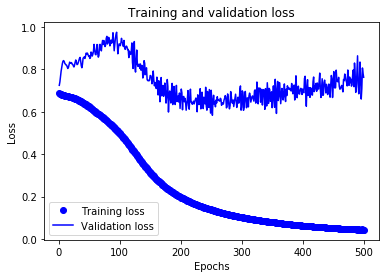

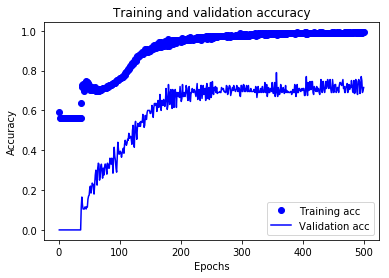

In [21]:
# Make use of matplot lib
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print (val_acc)

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
#unk for rare words - throw out all words that occur once or twice
#using mask - learn how that can help the model
#experiment with different dropouts

## CNN Model

In [49]:
def create_conv_model():
    model_conv = keras.Sequential()
    model_conv.add(keras.layers.Embedding(vocab_size, 16, input_length=507))
    model_conv.add(keras.layers.Dropout(0.2))
    model_conv.add(keras.layers.Conv1D(64, 5, activation='relu'))
    model_conv.add(keras.layers.MaxPooling1D(pool_size=4))
    model_conv.add(keras.layers.LSTM(100))
    model_conv.add(keras.layers.Dense(1, activation='sigmoid'))
    model_conv.compile(loss='binary_crossentropy', optimizer='adam',    metrics=['accuracy'])
    return model_conv

model_conv = create_conv_model()
cnnHistory = model_conv.fit(partial_x_train, partial_y_train, epochs=3, validation_data=(x_val, y_val))




Train on 2134 samples, validate on 200 samples
Epoch 1/3
2134/2134 [==============================] - 12s 5ms/step - loss: 0.6913 - acc: 0.5403 - val_loss: 0.7272 - val_acc: 0.0000e+00
Epoch 2/3
2134/2134 [==============================] - 11s 5ms/step - loss: 0.6880 - acc: 0.5623 - val_loss: 0.7331 - val_acc: 0.0000e+00
Epoch 3/3
2134/2134 [==============================] - 10s 5ms/step - loss: 0.6867 - acc: 0.5623 - val_loss: 0.7470 - val_acc: 0.0000e+00


In [41]:
acc = cnnHistory.history['acc']
val_acc = cnnHistory.history['val_acc']
loss = cnnHistory.history['loss']
val_loss = cnnHistory.history['val_loss']

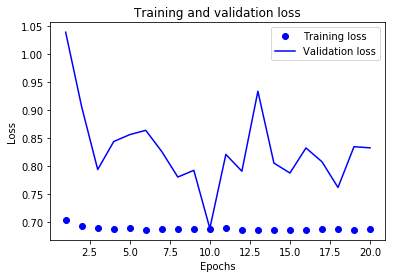

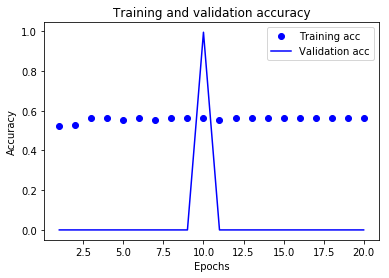

In [42]:
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.clf()   # clear figure
#acc_values = history_dict['acc']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()